In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization

In [68]:
X, y = make_moons(n_samples=300, noise=0.3)
X.shape, y.shape

((300, 2), (300,))

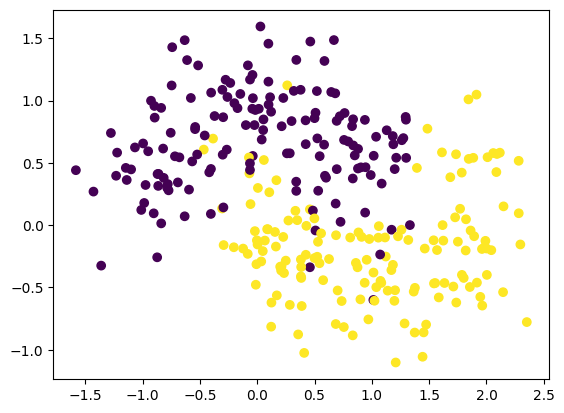

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [70]:
# Normalizing the inputs

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Without Batch Normalization

In [71]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(3, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X, y, epochs=100, verbose=0)

### With Batch Normalization

In [73]:
model2 = Sequential([
    InputLayer(shape=(2, )),
    Dense(3, activation="relu"),
    BatchNormalization(),
    Dense(2, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

### Inference
- As we can see there are 3 * 4 = 12 parameters for the 1st Batch Normalization layer and 2 * 4 = 8 parameters for the 2nd Batch Normalization layer. 4 Parameters for each node
- There are 10 non trainable parameters (the mean and std used for normalization). 6 from the 1st Batch Normalization layer and 4 from the 2nd Batch Normalization Layer

In [74]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history2 = model2.fit(X, y, epochs=100, verbose=0)

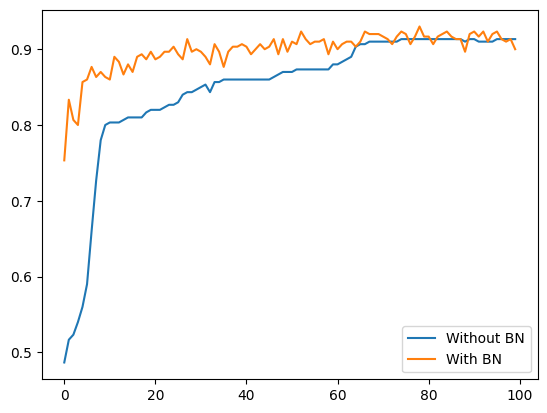

In [75]:
plt.plot(history.history["accuracy"], label="Without BN")
plt.plot(history2.history["accuracy"], label="With BN")
plt.legend()
plt.show()

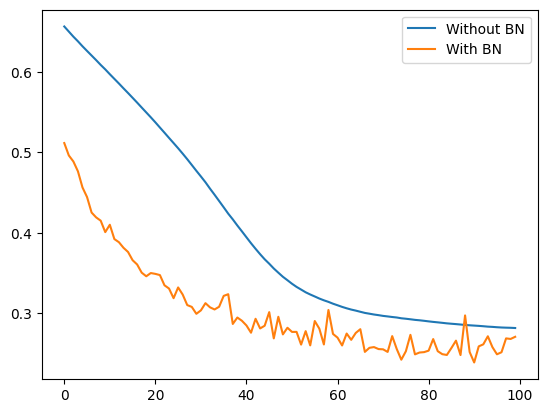

In [76]:
plt.plot(history.history["loss"], label="Without BN")
plt.plot(history2.history["loss"], label="With BN")
plt.legend()
plt.show()

### Inference
- As we can see the model converges much faster and the training is much stable with Batch Normalization applied
- But why the jaggedy jaggedy training 
    - BN normalizes activations based on the mean and variance of each mini-batch. These statistics fluctuate between batches, especially with small batch sizes, leading to instability in loss and accuracy.
Without BN, the model uses fixed statistics (global), leading to smoother curves. (Source - ChatGPT)